In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [6]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [7]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [8]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [9]:
X = df[['sex','class','embark_town','alone','age','fare']]
y = df['survived']

In [10]:
numeric_features = ['age','fare']
col_features = ['sex','class','embark_town','alone']

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [12]:
num_pipeline = Pipeline(steps = [
    ('impute',SimpleImputer(strategy = 'median')),
    ('scaler',StandardScaler())    
])

In [13]:
cat_pipeline = Pipeline(steps = [
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False))    
])

In [14]:
preprocessor= ColumnTransformer(transformers =[ 
        ("numeric",num_pipeline,numeric_features),
        ("categorical",cat_pipeline,col_features)
],
    remainder='passthrough')

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf = LogisticRegression(random_state=0)

In [17]:
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', clf)
])

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
X_train.columns

Index(['sex', 'class', 'embark_town', 'alone', 'age', 'fare'], dtype='object')

In [21]:
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['sex', 'class',
                                                   'embark_town', 'alone'])])),
                ('model', LogisticRegression(random_state=0))])

In [22]:
print("model score: %.3f" % clf_pipeline.score(X_test, y_test))

model score: 0.799


In [23]:
numeric_cols = clf_pipeline.named_steps['preprocessor'].named_transformers_['numeric'].named_steps['scaler'].get_feature_names_out(numeric_features)



In [24]:
onehot_cols = clf_pipeline.named_steps['preprocessor'].named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out(col_features)


In [25]:
numeric_cols

array(['age', 'fare'], dtype=object)

In [26]:
columns = numeric_cols.tolist()+onehot_cols.tolist()

In [27]:
columns

['age',
 'fare',
 'sex_female',
 'sex_male',
 'class_First',
 'class_Second',
 'class_Third',
 'embark_town_Cherbourg',
 'embark_town_Queenstown',
 'embark_town_Southampton',
 'alone_False',
 'alone_True']

In [28]:
X_train_pp = preprocessor.fit_transform(X_train)
pd.DataFrame(X_train_pp, columns=columns)

,age,fare,sex_female,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_False,alone_True
0,-0.045676,-0.331679,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.107186,-0.426405,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.107186,0.102620,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.733559,-0.555896,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,-0.657127,-0.491276,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.718637,1.023857,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
708,-0.809990,-0.479216,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
709,-0.045676,-0.481629,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
710,0.489343,-0.288681,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [29]:
pred_df = pd.DataFrame({
    "Predicted_survival": clf_pipeline.predict(X_test),
    "actual_survival": y_test
})
pred_df.join(X_test)

,Predicted_survival,actual_survival,sex,class,embark_town,alone,age,fare
495,0,0,male,Third,Cherbourg,True,NaN,14.4583
648,0,0,male,Third,Southampton,True,NaN,7.5500
278,0,0,male,Third,Queenstown,False,7.0,29.1250
31,1,1,female,First,Cherbourg,False,NaN,146.5208
255,1,1,female,Third,Cherbourg,False,29.0,15.2458
...,...,...,...,...,...,...,...,...
780,1,1,female,Third,Cherbourg,True,13.0,7.2292
837,0,0,male,Third,Southampton,True,NaN,8.0500
215,1,1,female,First,Cherbourg,False,31.0,113.2750
833,0,0,male,Third,Southampton,True,23.0,7.8542


In [30]:
clf_pipeline.score(X_test, y_test)

0.7988826815642458

In [31]:
coefs = clf_pipeline.named_steps["model"].coef_.flatten()
coef = pd.DataFrame(zip(columns, coefs), columns=["feature", "coef"])
coef["abs_coef"] = coef["coef"].apply(lambda x: abs(x))
coef["colors"] = coef["coef"].apply(lambda x: "green" if x > 0 else "red")
coef = coef.sort_values("abs_coef", ascending=False)

Text(0.5, 0, 'Feature Name')

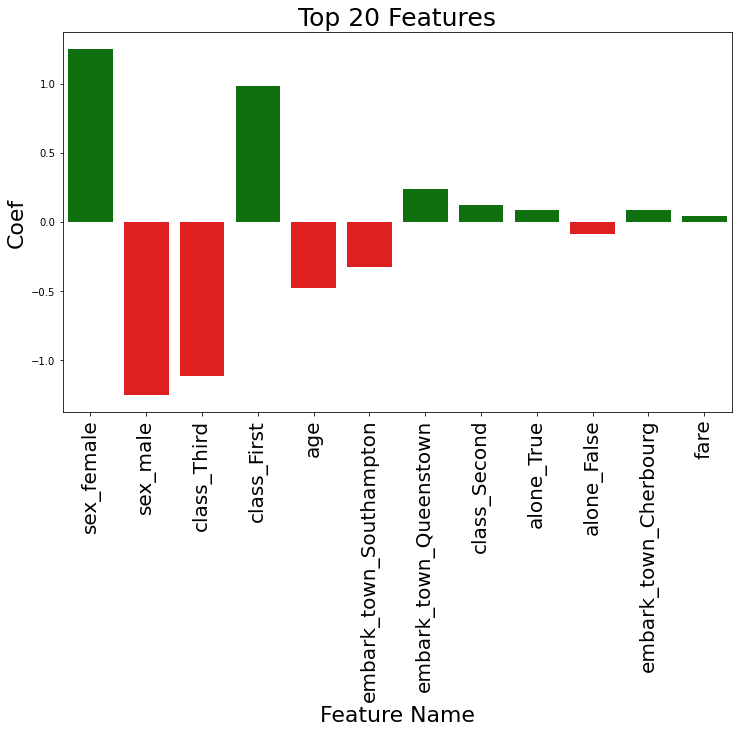

In [32]:
# Plot coef
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="coef",
            data=coef.head(20),
           palette=coef.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

In [33]:
clf_pipeline.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('numeric',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    ['age', 'fare']),
                                   ('categorical',
                                    Pipeline(steps=[('onehot',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                    ['sex', 'class', 'embark_town', 'alone'])])),
  ('model', LogisticRegression(random_state=0))],
 'verbose': False,
 'preprocessor': ColumnTransformer(remainder='passthrough',
                   transformers=[('numeric',
                          

In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_pipeline , X_train,y_train, cv = 5, scoring = 'accuracy').mean()

0.7851275485078302

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
grid_params = {'model__penalty' : ['none', 'l2'],
               'model__C' : np.logspace(-4, 4, 20)}

In [39]:
gs = GridSearchCV(clf_pipeline, grid_params, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)

print("Best Score of train set: "+str(gs.best_score_))
print("Best parameter set: "+str(gs.best_params_))
print("Test Score: "+str(gs.score(X_test,y_test)))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalt

Best Score of train set: 0.7977839062346105
Best parameter set: {'model__C': 0.03359818286283781, 'model__penalty': 'l2'}
Test Score: 0.7821229050279329


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
